# HeartScope: Predictive ML for Cardiovascular Risk

## 1. Data Import & Initial Exploration

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset=pd.read_csv(r"E:\Machine Learning\Projects\HeartDiseaseTrain-Test.csv")

In [3]:
dataset.head(3)

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,vessels_colored_by_flourosopy,thalassemia,target
0,52,Male,Typical angina,125,212,Lower than 120 mg/ml,ST-T wave abnormality,168,No,1.0,Downsloping,Two,Reversable Defect,0
1,53,Male,Typical angina,140,203,Greater than 120 mg/ml,Normal,155,Yes,3.1,Upsloping,Zero,Reversable Defect,0
2,70,Male,Typical angina,145,174,Lower than 120 mg/ml,ST-T wave abnormality,125,Yes,2.6,Upsloping,Zero,Reversable Defect,0


### 1.1. Pairplot & Correlation Heatmap

In [ ]:
sns.pairplot(data=dataset, hue="target")

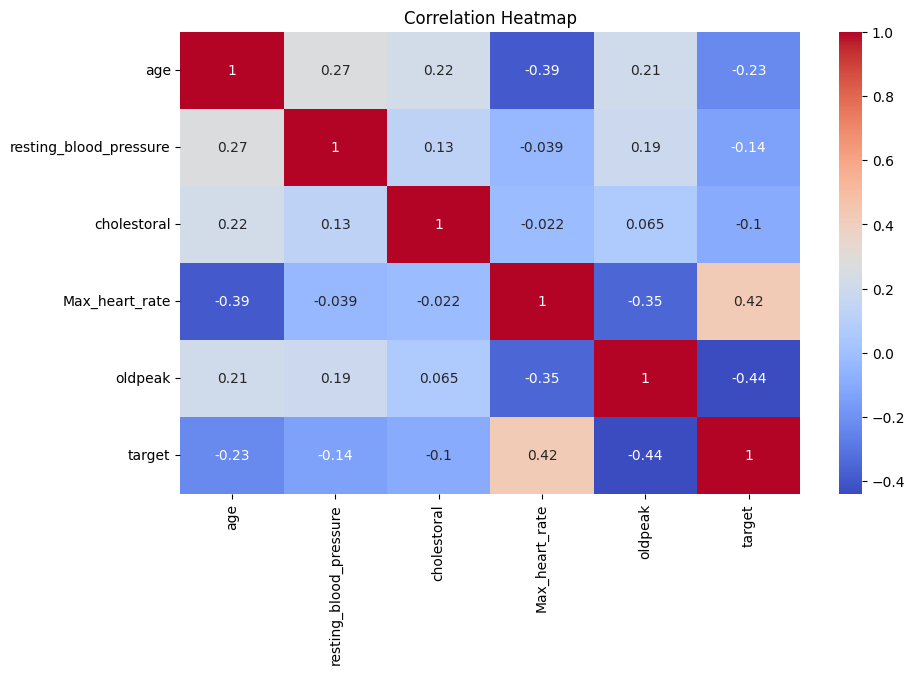

In [5]:
corr = dataset.corr(numeric_only=True)
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

## 2. Data Preprocessing

In [6]:
data=dataset

### 2.1 Handling Missing Values

In [7]:
data.isnull().sum()

age                              0
sex                              0
chest_pain_type                  0
resting_blood_pressure           0
cholestoral                      0
fasting_blood_sugar              0
rest_ecg                         0
Max_heart_rate                   0
exercise_induced_angina          0
oldpeak                          0
slope                            0
vessels_colored_by_flourosopy    0
thalassemia                      0
target                           0
dtype: int64

### 2.2 Encoding Categorical Features

In [8]:
from sklearn.preprocessing import OneHotEncoder
oe=OneHotEncoder(drop="first")

In [9]:
arr=oe.fit_transform(data[["sex"]]).toarray()
data["sex"]=pd.DataFrame(arr, columns=["sex"])

In [10]:
enc_chest=pd.DataFrame(oe.fit_transform(data[["chest_pain_type"]]).toarray(), columns=oe.get_feature_names_out(["chest_pain_type"]))
data.drop(columns="chest_pain_type", inplace=True)
data=pd.concat([data, enc_chest], axis=1)

In [11]:
data["fasting_blood_sugar"]=pd.DataFrame(oe.fit_transform(data[["fasting_blood_sugar"]]).toarray(), columns=["fasting_blood_sugar"])

In [12]:
enc_rest_ecg=pd.DataFrame(oe.fit_transform(data[["rest_ecg"]]).toarray(), columns=oe.get_feature_names_out(["rest_ecg"]))

In [13]:
data.drop(columns="rest_ecg", inplace=True)
data=pd.concat([data, enc_rest_ecg], axis=1)

In [14]:
enc_slope=pd.DataFrame(oe.fit_transform(data[["slope"]]).toarray(), columns=oe.get_feature_names_out(["slope"]))

In [15]:
data.drop(columns="slope", inplace=True)
data=pd.concat([data, enc_slope], axis=1)

In [16]:
enc_thalassemia=pd.DataFrame(oe.fit_transform(data[["thalassemia"]]).toarray(), columns=oe.get_feature_names_out(["thalassemia"]))

In [17]:
data.drop(columns="thalassemia", inplace=True)
data=pd.concat([data, enc_thalassemia], axis=1)

In [18]:
data["exercise_induced_angina"]=pd.DataFrame(oe.fit_transform(data[["exercise_induced_angina"]]).toarray(), columns=["exercise_induced_angina"])

In [19]:
mapping = {
    "Zero": 0,
    "One": 1,
    "Two": 2,
    "Three": 3,
    "Four": 4
}
data["vessels_colored_by_flourosopy"]=data["vessels_colored_by_flourosopy"].map(mapping)

### 2.3. Feature Scaling

In [20]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [21]:
data['age']=pd.DataFrame(sc.fit_transform(data[['age']]), columns=['age'])

In [22]:
data['resting_blood_pressure']=pd.DataFrame(sc.fit_transform(data[['resting_blood_pressure']]), columns=['resting_blood_pressure'])

In [23]:
data['cholestoral']=pd.DataFrame(sc.fit_transform(data[['cholestoral']]), columns=['cholestoral'])

In [24]:
data['Max_heart_rate']=pd.DataFrame(sc.fit_transform(data[['Max_heart_rate']]), columns=['Max_heart_rate'])

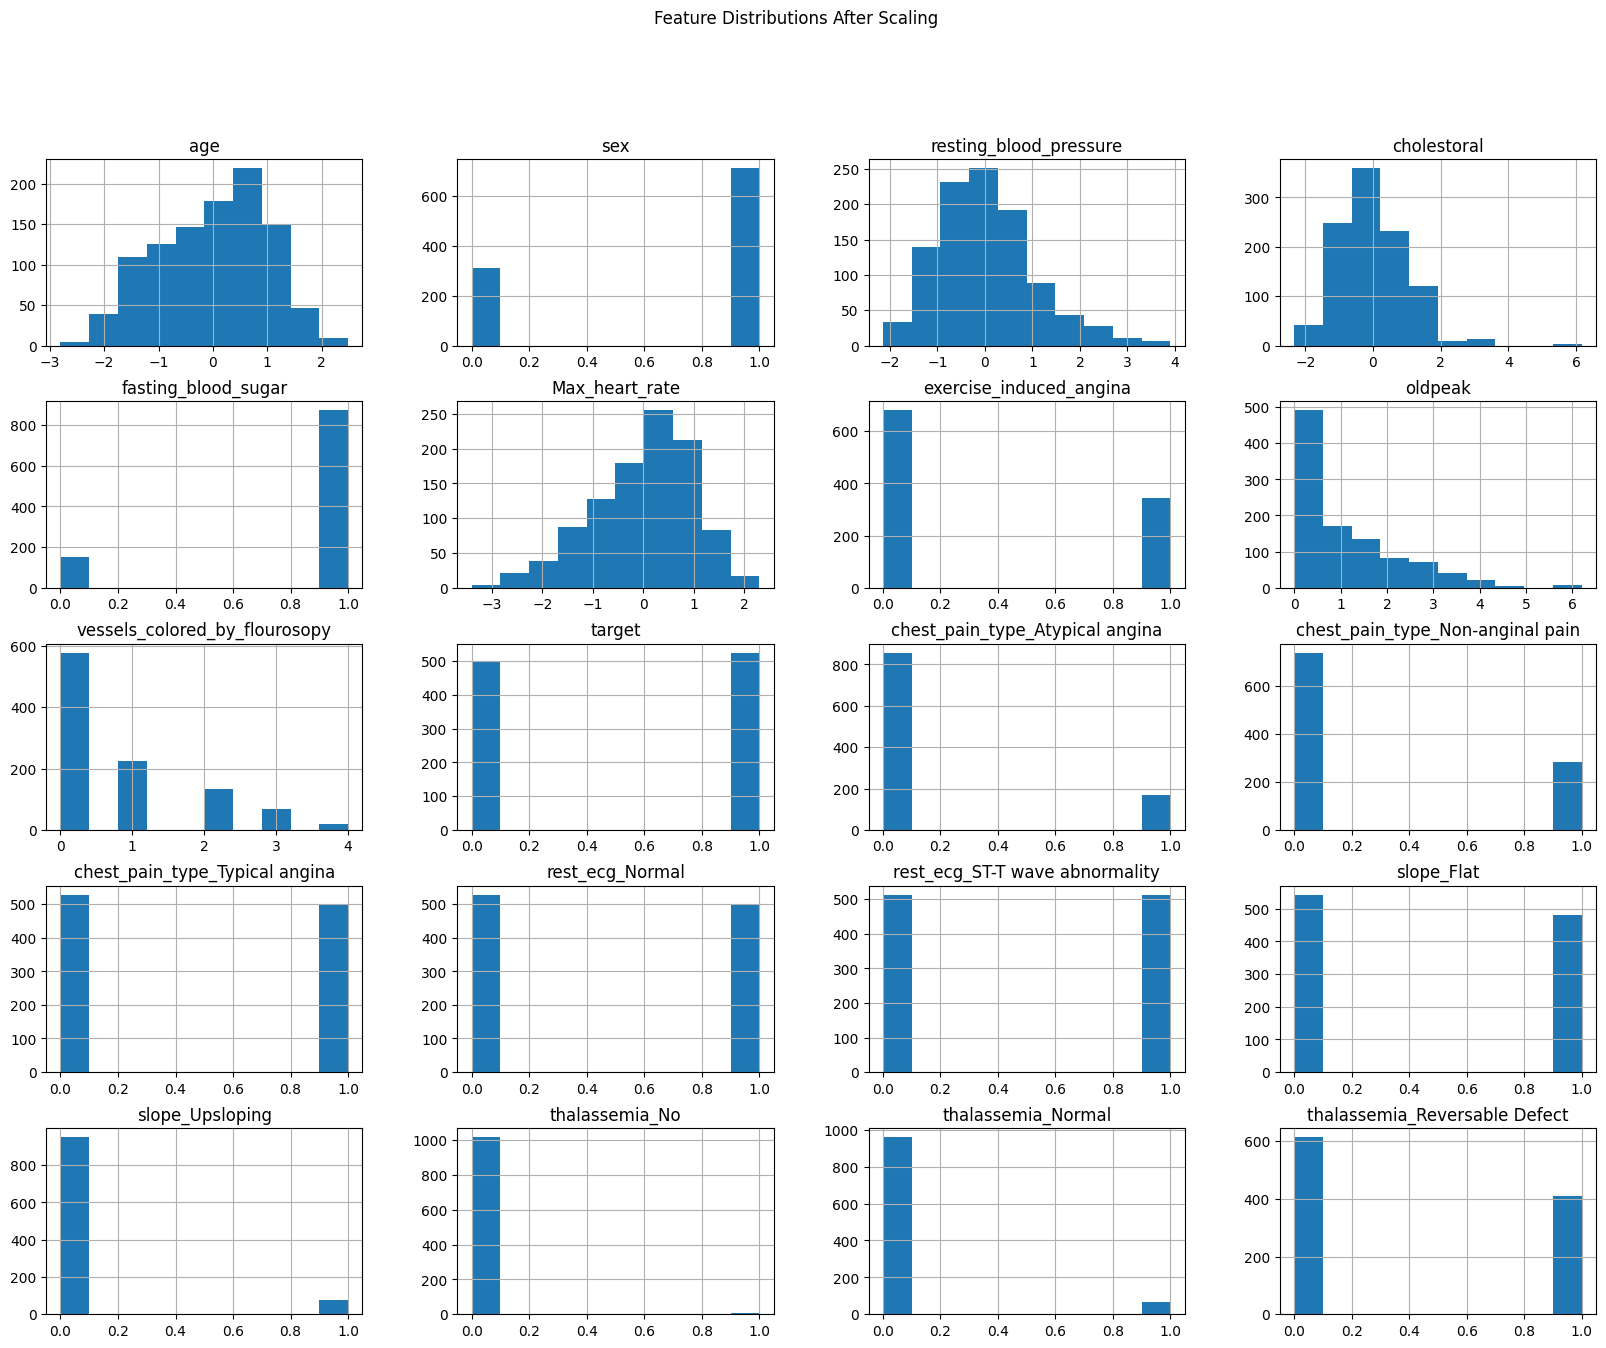

In [25]:
data.hist(figsize=(20,15))
plt.suptitle("Feature Distributions After Scaling")
plt.show()

### 2.4. Removal of Outliers

In [26]:
q1 = data["resting_blood_pressure"].quantile(0.25)
q3 = data["resting_blood_pressure"].quantile(0.75)
IQR = q3 - q1

min_range = q1 - 1.5 * IQR
max_range = q3 + 1.5 * IQR

data = data[(data["resting_blood_pressure"] >= min_range) & (data["resting_blood_pressure"] <= max_range)]

In [27]:
q1 = data["cholestoral"].quantile(0.25)
q3 = data["cholestoral"].quantile(0.75)
IQR = q3 - q1

min_range = q1 - 1.5 * IQR
max_range = q3 + 1.5 * IQR

data = data[(data["cholestoral"] >= min_range) & (data["cholestoral"] <= max_range)]

In [28]:
q1 = data["Max_heart_rate"].quantile(0.25)
q3 = data["Max_heart_rate"].quantile(0.75)
IQR = q3 - q1

min_range = q1 - 1.5 * IQR
max_range = q3 + 1.5 * IQR

data = data[(data["Max_heart_rate"] >= min_range) & (data["Max_heart_rate"] <= max_range)]

In [29]:
q1 = data["oldpeak"].quantile(0.25)
q3 = data["oldpeak"].quantile(0.75)
IQR = q3 - q1

min_range = q1 - 1.5 * IQR
max_range = q3 + 1.5 * IQR

data = data[(data["oldpeak"] >= min_range) & (data["oldpeak"] <= max_range)]

In [30]:
q1 = data["vessels_colored_by_flourosopy"].quantile(0.25)
q3 = data["vessels_colored_by_flourosopy"].quantile(0.75)
IQR = q3 - q1

min_range = q1 - 1.5 * IQR
max_range = q3 + 1.5 * IQR

data = data[(data["vessels_colored_by_flourosopy"] >= min_range) & (data["vessels_colored_by_flourosopy"] <= max_range)]

#### 2.4.1. Graphical View after Removal of Outliers

<Axes: xlabel='vessels_colored_by_flourosopy', ylabel='Density'>

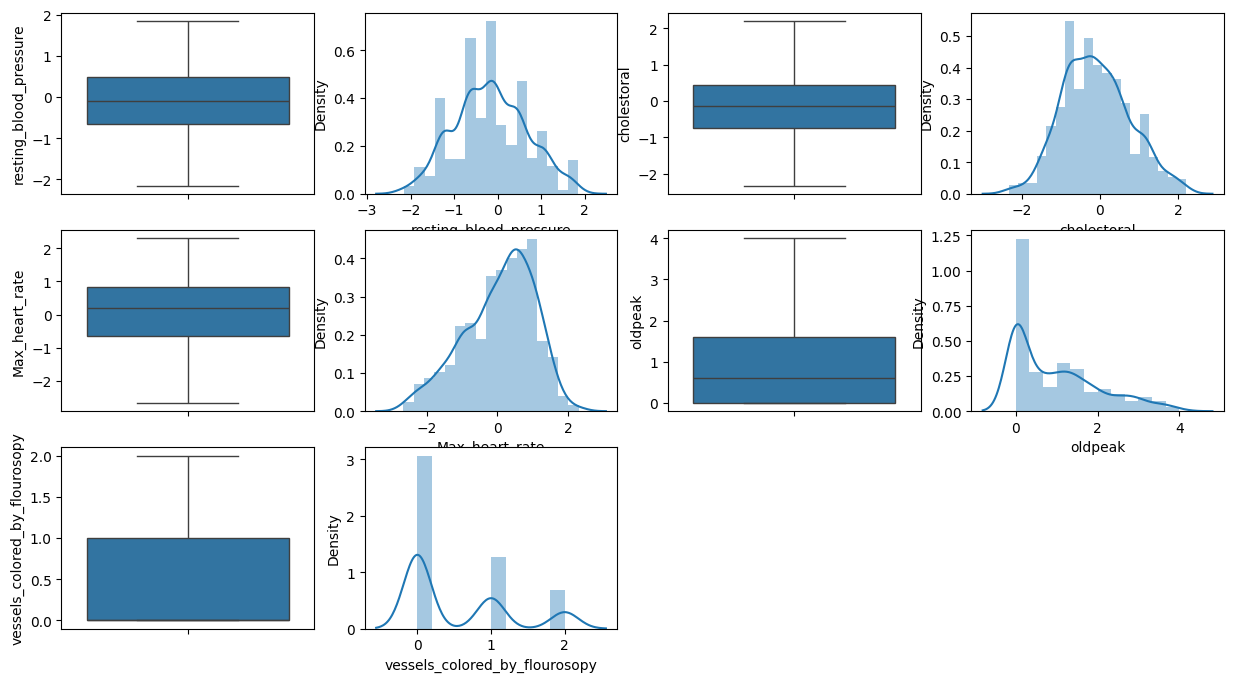

In [102]:
plt.figure(figsize=(15, 8))

plt.subplot(3,4, 1)
sns.boxplot(data=data["resting_blood_pressure"])
plt.subplot(3,4, 3)
sns.boxplot(data=data["cholestoral"])
plt.subplot(3,4, 5)
sns.boxplot(data=data["Max_heart_rate"])
plt.subplot(3,4, 7)
sns.boxplot(data=data["oldpeak"])
plt.subplot(3,4, 9)
sns.boxplot(data=data["vessels_colored_by_flourosopy"])


plt.subplot(3,4, 2)
sns.distplot(data['resting_blood_pressure'])
plt.subplot(3,4, 4)
sns.distplot(data['cholestoral'])
plt.subplot(3,4, 6)
sns.distplot(data['Max_heart_rate'])
plt.subplot(3,4, 8)
sns.distplot(data['oldpeak'])
plt.subplot(3,4, 10)
sns.distplot(data['vessels_colored_by_flourosopy'])


### Graph After Data Preprocessing

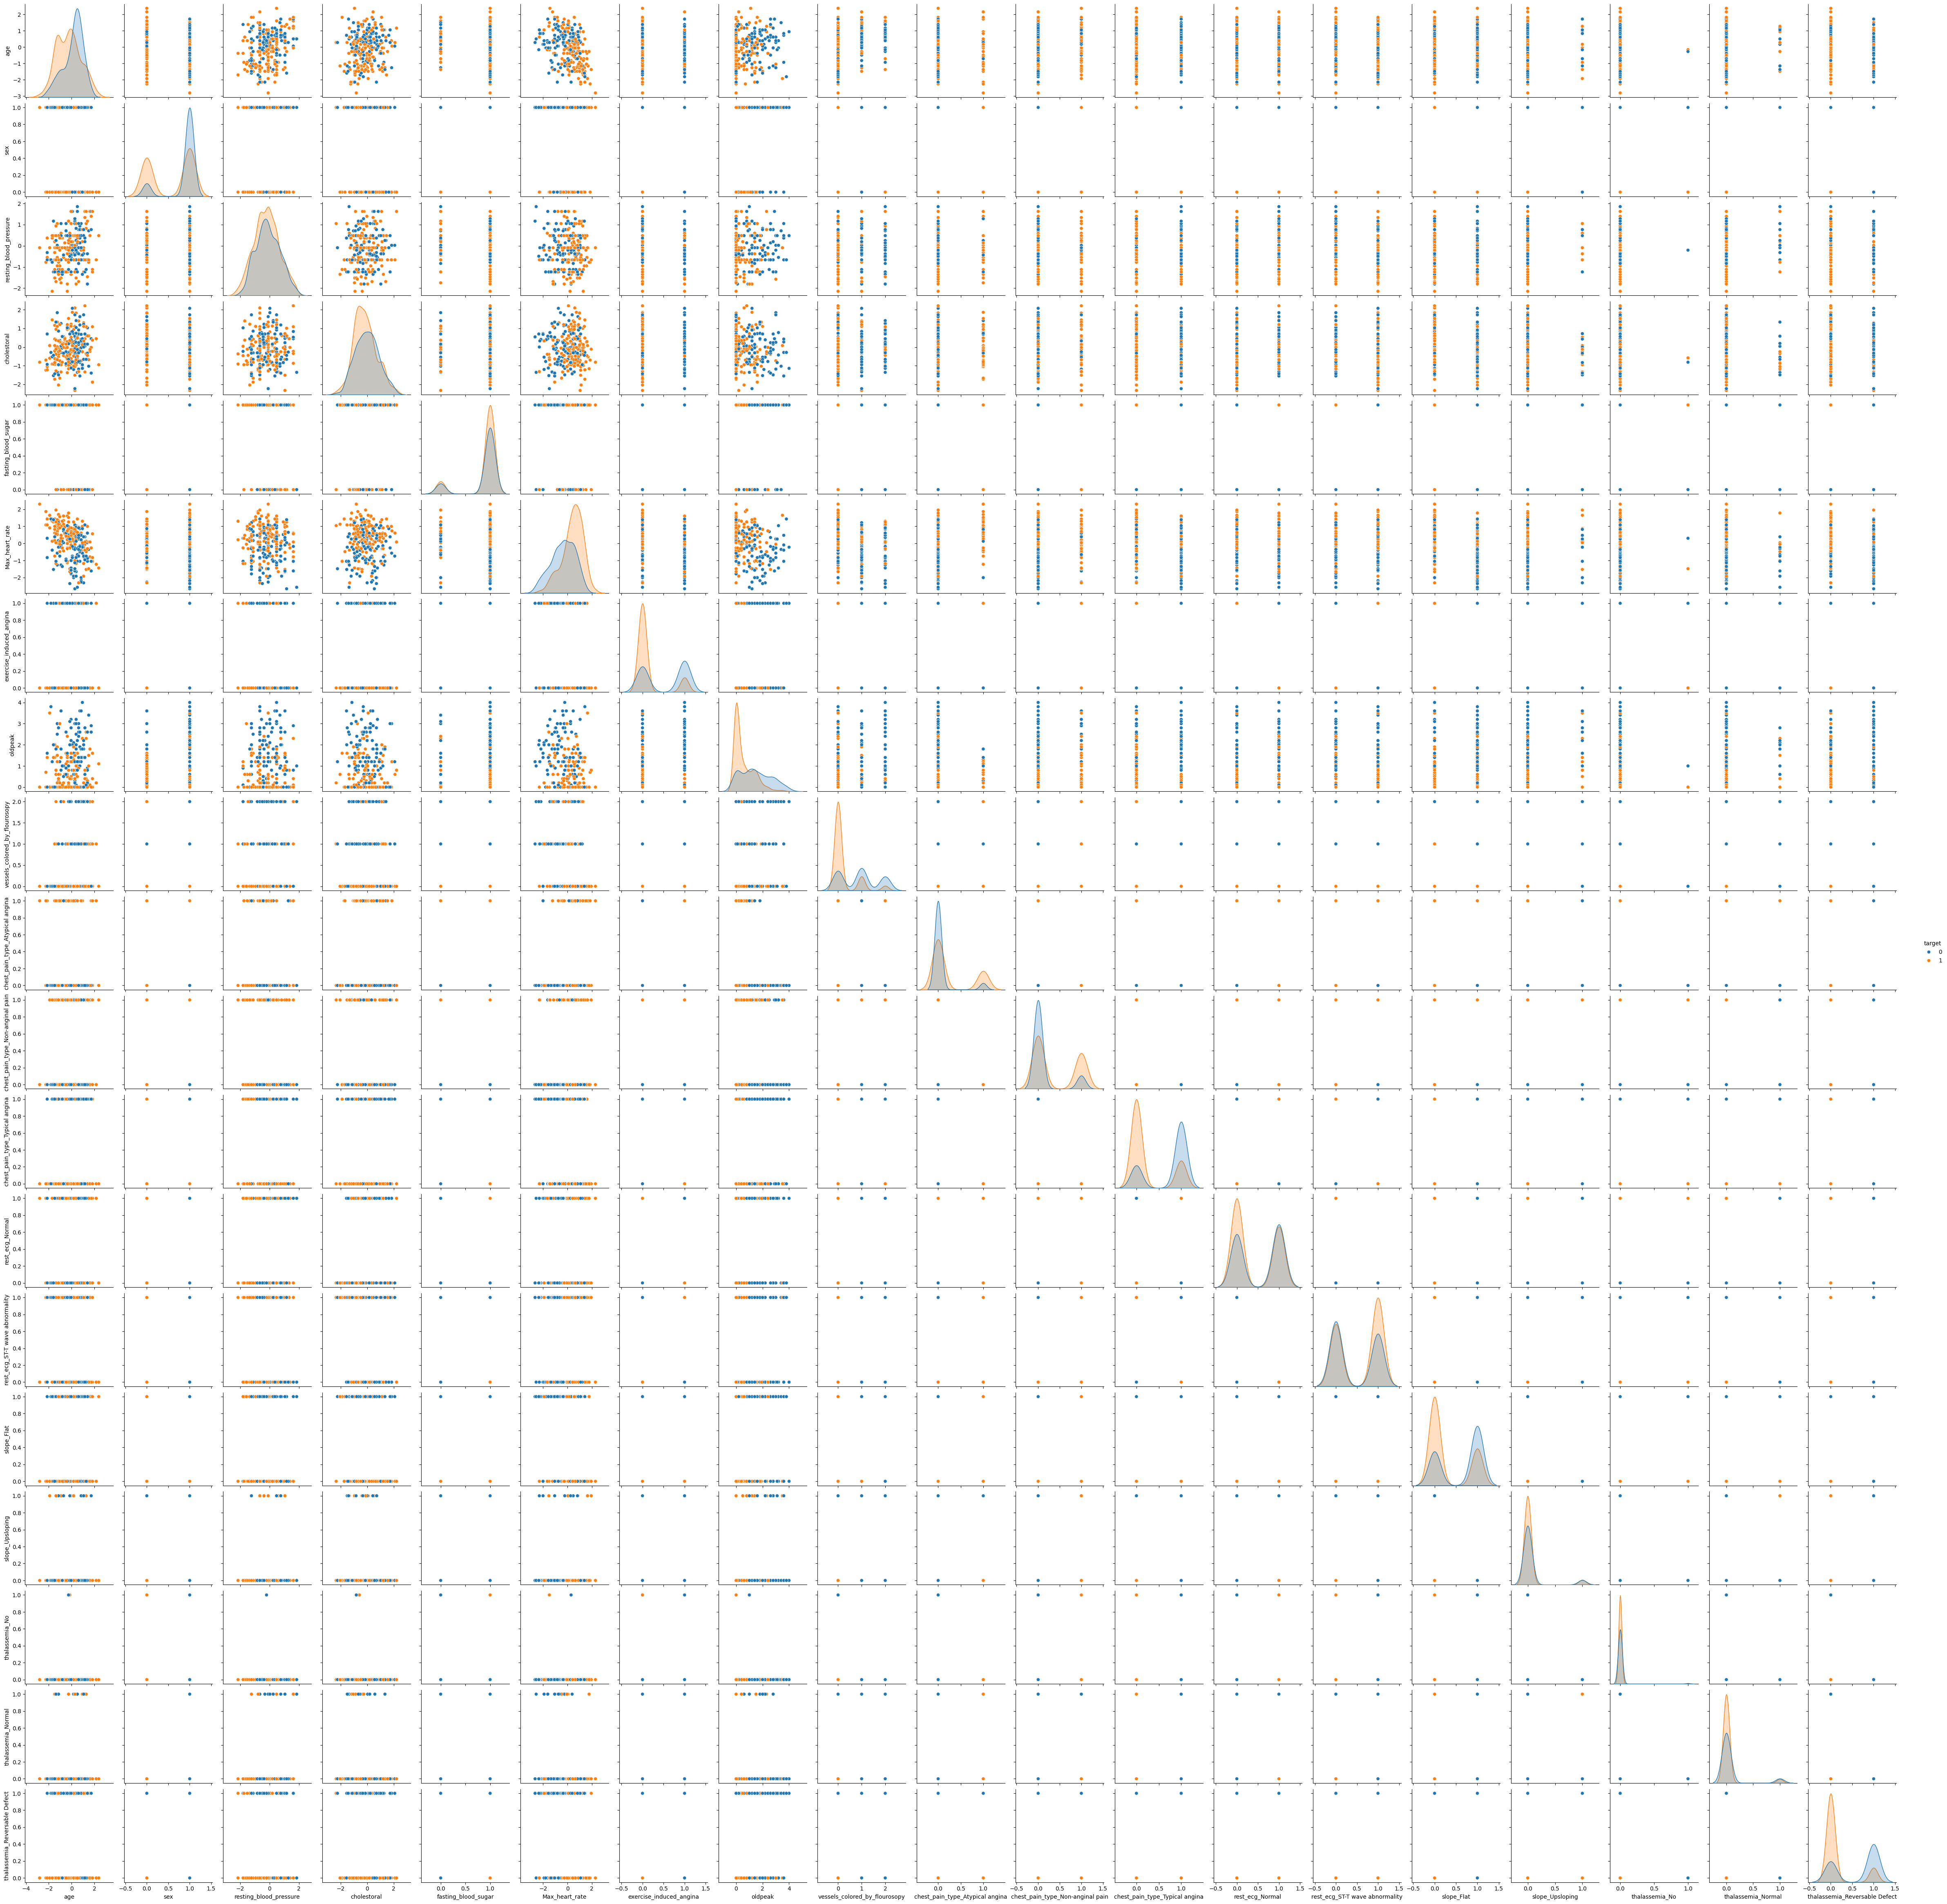

In [32]:
sns.pairplot(data=data, hue="target")

## 3. Data Splitting

In [33]:
y=data["target"]
data.drop(columns="target", inplace=True)
data["target"]=y

In [34]:
x=data.iloc[:,:-1]
y=data["target"]

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.3, random_state=42)

## 4. Model Training

### 4.1. Random Forest

In [37]:
from sklearn.ensemble import RandomForestClassifier

In [38]:
rf=RandomForestClassifier(n_estimators=42)

In [39]:
rf.fit(x_train, y_train)

,n_estimators,42
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [40]:
rf.score(x_test, y_test)*100

98.47328244274809

### 4.2. Decision Tree

In [41]:
from sklearn.tree import DecisionTreeClassifier

In [42]:
dt=DecisionTreeClassifier()

In [43]:
dt.fit(x_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [44]:
dt.score(x_test, y_test)*100

97.32824427480917

### 4.3. K-Nearest Neighbors (KNN)

In [45]:
from sklearn.neighbors import KNeighborsClassifier

In [46]:
knn=KNeighborsClassifier(n_neighbors=5)

In [47]:
knn.fit(x_train, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [48]:
knn.score(x_test, y_test)*100

87.02290076335878

### 4.4. Support Vector Machine

In [49]:
from sklearn.svm import SVC

In [50]:
sv=SVC()

In [51]:
sv.fit(x_train, y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [52]:
sv.score(x_test, y_test)*100

89.69465648854961

### 4.5. Logistic Regression

In [53]:
from sklearn.linear_model import LogisticRegression

In [54]:
lr=LogisticRegression()

In [55]:
lr.fit(x_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [56]:
lr.score(x_test, y_test)*100

86.64122137404581

### Gradient Boosting

In [57]:
from sklearn.ensemble import GradientBoostingClassifier

In [58]:
gb=GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

In [59]:
gb.fit(x_train, y_train)

,loss,'log_loss'
,learning_rate,0.1
,n_estimators,100
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


In [60]:
gb.score(x_test, y_test)*100

96.94656488549617

## 5. Model Evaluation

In [61]:
from sklearn.metrics import confusion_matrix, recall_score, f1_score, precision_score

### 5.1. Random Forest Evaluation

Text(0.5, 23.52222222222222, 'Random Forest')

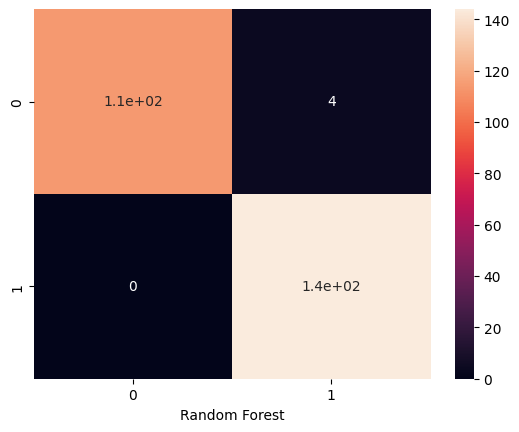

In [62]:
rcf=confusion_matrix(y_test, rf.predict(x_test))
sns.heatmap(rcf, annot=True)
plt.xlabel("Random Forest")

In [63]:
recall_score(y_test, rf.predict(x_test))*100

100.0

In [64]:
precision_score(y_test, rf.predict(x_test))*100

97.2972972972973

In [65]:
f1_score(y_test, rf.predict(x_test))*100

98.63013698630137

In [66]:
from sklearn.model_selection import cross_val_score, KFold
cross_val_score(RandomForestClassifier(), x, y, cv=KFold(n_splits=5))*100

array([100.        , 100.        , 100.        , 100.        ,
        98.27586207])

### 5.2. Decision Tree Evaluation

Text(0.5, 23.52222222222222, 'Decision Tree')

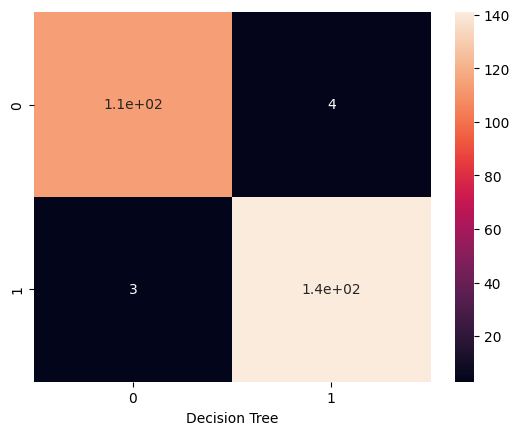

In [67]:
dcf=confusion_matrix(y_test, dt.predict(x_test))
sns.heatmap(dcf, annot=True)
plt.xlabel("Decision Tree")

In [68]:
recall_score(y_test, dt.predict(x_test))*100

97.91666666666666

In [69]:
precision_score(y_test, dt.predict(x_test))*100

97.24137931034483

In [70]:
f1_score(y_test, dt.predict(x_test))*100

97.57785467128028

In [71]:
from sklearn.model_selection import cross_val_score, KFold
cross_val_score(DecisionTreeClassifier(), x, y, cv=KFold(n_splits=5))*100

array([100.        , 100.        ,  98.28571429, 100.        ,
       100.        ])

### 5.3. K-Nearest Neighbors (KNN) Evaluation

Text(0.5, 23.52222222222222, 'KNN Matrix')

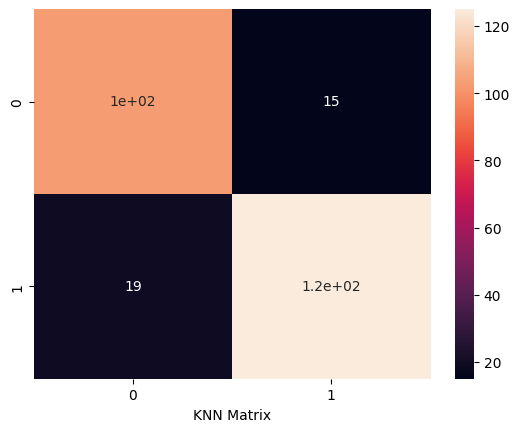

In [72]:
kcf=confusion_matrix(y_test, knn.predict(x_test))
sns.heatmap(kcf, annot=True)
plt.xlabel("KNN Matrix")

In [73]:
recall_score(y_test, knn.predict(x_test))*100

86.80555555555556

In [74]:
precision_score(y_test, knn.predict(x_test))*100

89.28571428571429

In [75]:
f1_score(y_test, knn.predict(x_test))*100

88.02816901408451

In [76]:
from sklearn.model_selection import cross_val_score, KFold
cross_val_score(KNeighborsClassifier(), x, y, cv=KFold(n_splits=5))*100

array([84.57142857, 85.14285714, 85.71428571, 83.90804598, 81.6091954 ])

###  5.4. Support Vector Machine Evaluation

Text(0.5, 23.52222222222222, 'SVM Matrix')

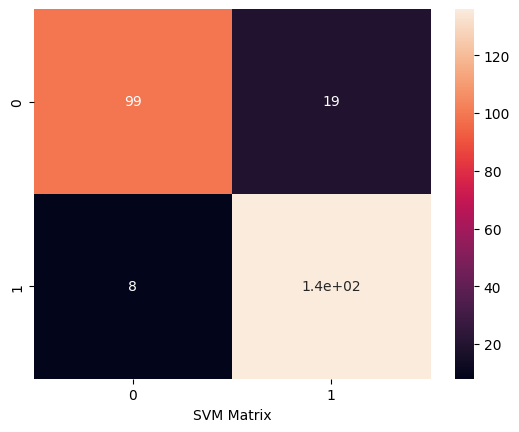

In [77]:
scf=confusion_matrix(y_test, sv.predict(x_test))
sns.heatmap(scf, annot=True)
plt.xlabel("SVM Matrix")

In [78]:
recall_score(y_test, sv.predict(x_test))*100

94.44444444444444

In [79]:
precision_score(y_test, sv.predict(x_test))*100

87.74193548387098

In [80]:
f1_score(y_test, sv.predict(x_test))*100

90.96989966555184

In [81]:
from sklearn.model_selection import cross_val_score, KFold
cross_val_score(SVC(), x, y, cv=KFold(n_splits=5))*100

array([97.14285714, 96.57142857, 89.14285714, 90.22988506, 87.35632184])

### 5.5.  Logistic Regression Evaluation

Text(0.5, 23.52222222222222, 'Logistic Regression Matrix')

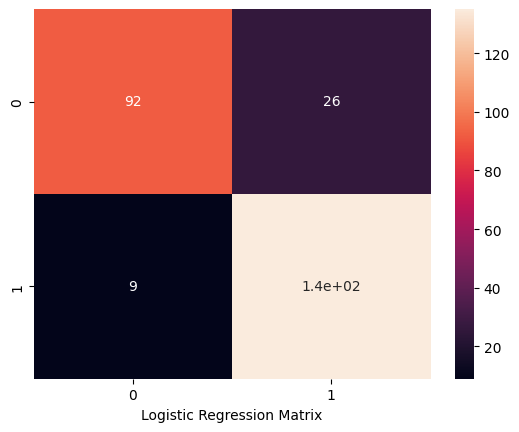

In [82]:
lcf=confusion_matrix(y_test, lr.predict(x_test))
sns.heatmap(lcf, annot=True)
plt.xlabel("Logistic Regression Matrix")

In [83]:
recall_score(y_test, lr.predict(x_test))*100

93.75

In [84]:
precision_score(y_test, lr.predict(x_test))*100

83.85093167701864

In [85]:
f1_score(y_test, lr.predict(x_test))*100

88.52459016393442

In [86]:
from sklearn.model_selection import cross_val_score, KFold
cross_val_score(LogisticRegression(), x, y, cv=KFold(n_splits=5))*100

array([84.        , 85.71428571, 89.14285714, 85.63218391, 82.18390805])

###  5.6. Gradient Boosting Evaluation

Text(0.5, 23.52222222222222, 'Gradient Boosting Matrix')

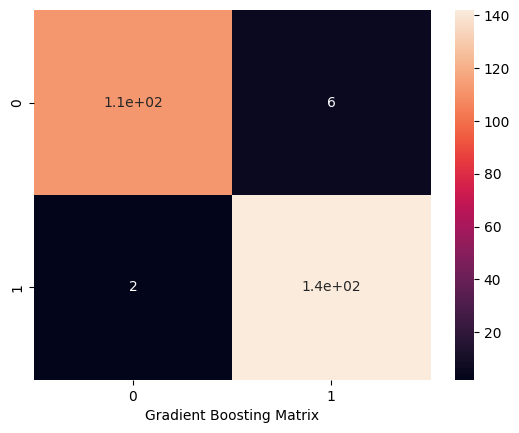

In [87]:
gcf=confusion_matrix(y_test, gb.predict(x_test))
sns.heatmap(gcf, annot=True)
plt.xlabel("Gradient Boosting Matrix")

In [88]:
recall_score(y_test, gb.predict(x_test))*100

98.61111111111111

In [89]:
precision_score(y_test, gb.predict(x_test))*100

95.94594594594594

In [90]:
f1_score(y_test, gb.predict(x_test))*100

97.26027397260275

In [91]:
from sklearn.model_selection import cross_val_score, KFold
cross_val_score(GradientBoostingClassifier(), x, y, cv=KFold(n_splits=5))*100

array([ 96.57142857, 100.        ,  96.57142857,  98.85057471,
        97.12643678])

## 6. Score Comparison of all Models

In [92]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

models = {
    "Logistic Regression": lr,
    "Decision Tree": dt,
    "Random Forest": rf,
    "Gradient Boosting": gb,
    "SVM": sv,
    "KNN": knn
}

results = []

for name, clf in models.items():
    y_pred = clf.predict(x_test)
    y_prob = clf.predict_proba(x_test)[:,1] if hasattr(clf, "predict_proba") else None

    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred)*100,
        "Precision": precision_score(y_test, y_pred)*100,
        "Recall": recall_score(y_test, y_pred)*100,
        "F1-Score": f1_score(y_test, y_pred)*100,
    })

result_df = pd.DataFrame(results)
from tabulate import tabulate

print(tabulate(result_df, headers='keys', tablefmt='fancy_grid', showindex=False))


╒═════════════════════╤════════════╤═════════════╤══════════╤════════════╕
│ Model               │   Accuracy │   Precision │   Recall │   F1-Score │
╞═════════════════════╪════════════╪═════════════╪══════════╪════════════╡
│ Logistic Regression │    86.6412 │     83.8509 │  93.75   │    88.5246 │
├─────────────────────┼────────────┼─────────────┼──────────┼────────────┤
│ Decision Tree       │    97.3282 │     97.2414 │  97.9167 │    97.5779 │
├─────────────────────┼────────────┼─────────────┼──────────┼────────────┤
│ Random Forest       │    98.4733 │     97.2973 │ 100      │    98.6301 │
├─────────────────────┼────────────┼─────────────┼──────────┼────────────┤
│ Gradient Boosting   │    96.9466 │     95.9459 │  98.6111 │    97.2603 │
├─────────────────────┼────────────┼─────────────┼──────────┼────────────┤
│ SVM                 │    89.6947 │     87.7419 │  94.4444 │    90.9699 │
├─────────────────────┼────────────┼─────────────┼──────────┼────────────┤
│ KNN                 │  

## 7. Feature Importance Analysis using sequential_feature_selector

In [96]:
from mlxtend.feature_selection import SequentialFeatureSelector

In [97]:
sc=SequentialFeatureSelector(rf, k_features=3, forward=True)

In [98]:
sc.fit(x_train, y_train)

,estimator,RandomForestC...estimators=42)
,k_features,"(3, ...)"
,forward,True
,floating,False
,verbose,0
,scoring,'accuracy'
,cv,5
,n_jobs,1
,pre_dispatch,'2*n_jobs'
,clone_estimator,True
,fixed_features,None


In [99]:
sc.k_score_*100

np.float64(96.24283619885378)

In [100]:
sc.k_feature_names_

('age', 'cholestoral', 'chest_pain_type_Typical angina')

## 8. Best Model & Insights

*The selected best model, Random Forest Classifier, achieved a high overall performance with a score of 98.4733%. Its detailed evaluation metrics are: Precision = 97.2973%, Recall = 100%, F1-Score = 98.6301%, Accuracy = 98.4733%. The most important features contributing to the predictions were age, cholesterol, and chest pain type (Typical angina), highlighting their critical role in assessing heart disease risk. This analysis demonstrates that the model not only performs exceptionally overall but also reliably identifies high-risk cases based on key clinical indicators.*